In [1]:
!pip install yfinance pandas


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 15.3 MB/s  0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15703 sha256=70ce764ea08897f5ca58df0ccad2dd9478b44670d45b49807cf2d2e256d72e6b
  Stored in directory: c:\users\shriya shetty\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
Successfully built multitasking

   ---------------------------------------- 0/5 [peewee]
   ---------------------------------------- 0/5 [peewee]
   ---------------------------------------- 0/5 [peewee]
   -------- -----------

In [2]:
import pandas as pd
import yfinance as yf

tickers = {
    "gold": "GLD",
    "dxy": "DX-Y.NYB",
    "crude": "CL=F",
    "us10y": "^TNX",
    "sp500": "^GSPC"
}

start_date = "2021-01-01"   
end_date = None            

data = {}

for name, ticker in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date)
    data[name] = df["Close"]


final_df = pd.concat(data, axis=1)


final_df = final_df.dropna()


final_df.reset_index(inplace=True)
final_df.to_csv("gold_macro_5y.csv", index=False)

final_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,gold,dxy,crude,us10y,sp500
Ticker,,GLD,DX-Y.NYB,CL=F,^TNX,^GSPC
0,2021-01-04,182.330002,89.879997,47.619999,0.917,3700.649902
1,2021-01-05,182.869995,89.440002,49.930000,0.955,3726.860107
2,2021-01-06,179.899994,89.529999,50.630001,1.042,3748.139893
3,2021-01-07,179.479996,89.830002,50.830002,1.071,3803.790039
4,2021-01-08,173.339996,90.099998,52.240002,1.105,3824.679932


In [5]:
import pandas as pd

df = pd.read_csv("gold_macro_5y.csv")
df.head()

,Date,gold,dxy,crude,us10y,sp500
0,NaN,GLD,DX-Y.NYB,CL=F,^TNX,^GSPC
1,2021-01-04,182.3300018310547,89.87999725341797,47.619998931884766,0.9169999957084656,3700.64990234375
2,2021-01-05,182.8699951171875,89.44000244140625,49.93000030517578,0.9549999833106995,3726.860107421875
3,2021-01-06,179.89999389648438,89.52999877929688,50.630001068115234,1.0420000553131104,3748.139892578125
4,2021-01-07,179.47999572753906,89.83000183105469,50.83000183105469,1.0709999799728394,3803.7900390625


In [6]:
df.shape , df.columns

((1292, 6),
 Index(['Date', 'gold', 'dxy', 'crude', 'us10y', 'sp500'], dtype='object'))

In [16]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 1 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1291 non-null   datetime64[ns]
 1   gold    1292 non-null   object        
 2   dxy     1292 non-null   object        
 3   crude   1292 non-null   object        
 4   us10y   1292 non-null   object        
 5   sp500   1292 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 70.7+ KB


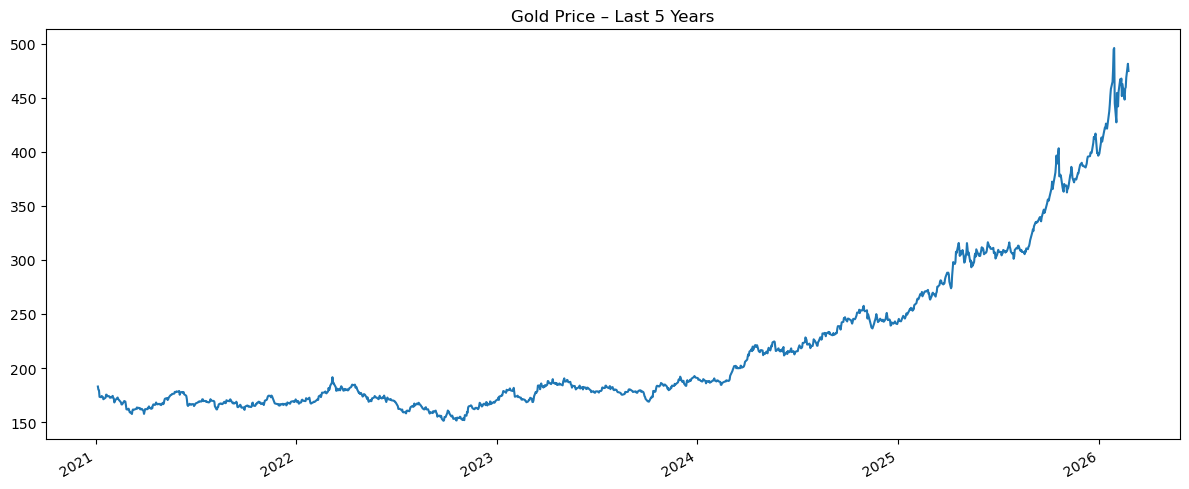

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
plt.close("all")
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df["Date"], df["gold"])
ax.set_title("Gold Price – Last 5 Years")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.minorticks_off()
ax.tick_params(axis="x", which="minor", bottom=False)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [33]:
df.describe()

,Date
count,1291
mean,2023-07-28 14:11:03.671572224
min,2021-01-04 00:00:00
25%,2022-04-13 12:00:00
50%,2023-07-28 00:00:00
75%,2024-11-06 12:00:00
max,2026-02-24 00:00:00


In [36]:
import pandas as pd
import numpy as np

cols = ["gold","dxy","crude","us10y","sp500"]
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna().sort_values("Date")

In [38]:
for c in cols:
    df[f"{c}_ret"] = np.log(df[c] / df[c].shift(1))

df = df.dropna()
df[[ "Date", "gold", "gold_ret" ]].head()

,Date,gold,gold_ret
2,2021-01-05,182.869995,0.002957
3,2021-01-06,179.899994,-0.016374
4,2021-01-07,179.479996,-0.002337
5,2021-01-08,173.339996,-0.034809
6,2021-01-11,173.000000,-0.001963


In [39]:
df["gold_vol_30d"] = df["gold_ret"].rolling(30).std() * np.sqrt(252)

In [40]:
df["gold_ma20"] = df["gold"].rolling(20).mean()
df["gold_ma50"] = df["gold"].rolling(50).mean()

df["gold_peak"] = df["gold"].cummax()
df["gold_drawdown"] = (df["gold"] / df["gold_peak"]) - 1

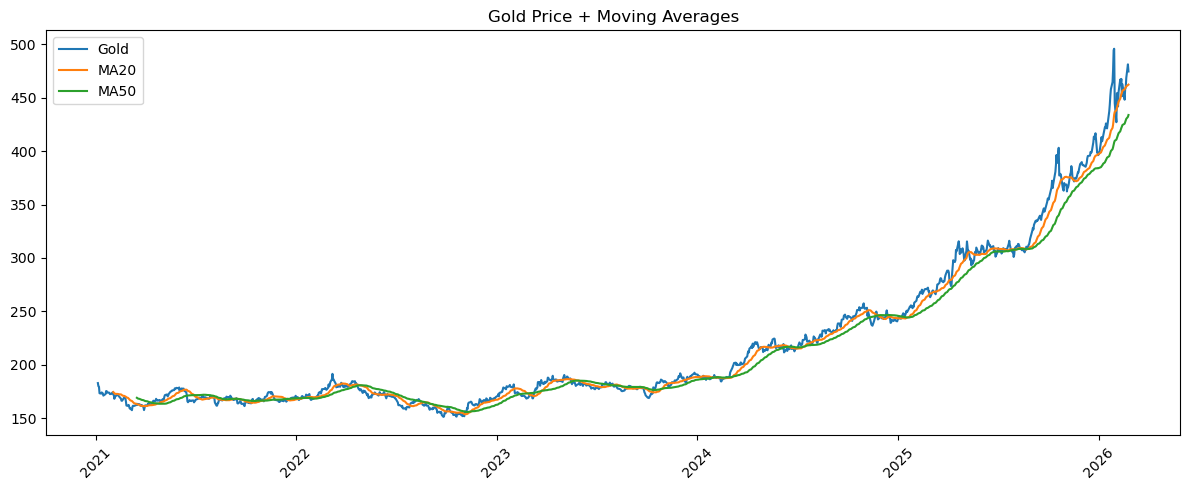

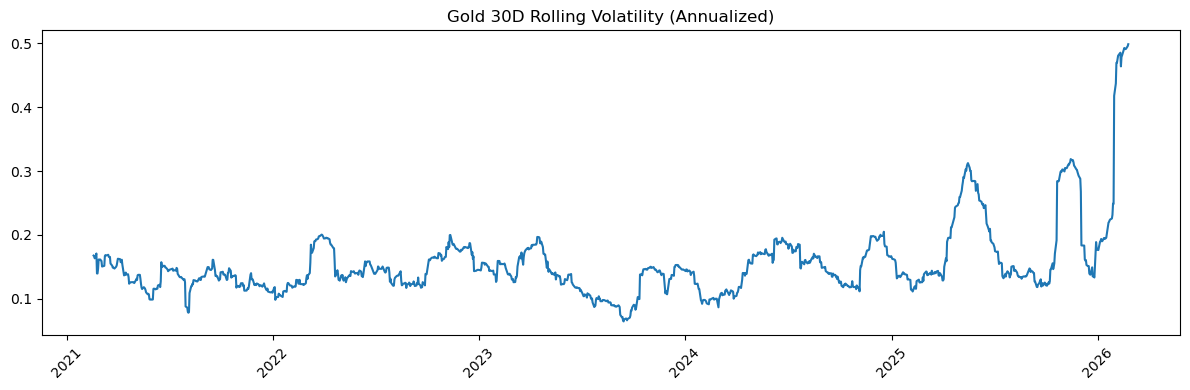

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["gold"], label="Gold")
plt.plot(df["Date"], df["gold_ma20"], label="MA20")
plt.plot(df["Date"], df["gold_ma50"], label="MA50")
plt.title("Gold Price + Moving Averages")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["gold_vol_30d"])
plt.title("Gold 30D Rolling Volatility (Annualized)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
df.dtypes

Date             datetime64[ns]
gold                    float64
dxy                     float64
crude                   float64
us10y                   float64
sp500                   float64
gold_ret                float64
dxy_ret                 float64
crude_ret               float64
us10y_ret               float64
sp500_ret               float64
gold_vol_30d            float64
gold_ma20               float64
gold_ma50               float64
gold_peak               float64
gold_drawdown           float64
dtype: object

In [44]:
import numpy as np
import pandas as pd

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

cols = ["gold","dxy","crude","us10y","sp500"]

for c in cols:
   
    df[c] = (
        df[c].astype(str)
             .str.replace(",", "", regex=False)
             .replace("nan", np.nan)
    )
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[cols].isna().sum(), df.dtypes

(gold     0
 dxy      0
 crude    0
 us10y    0
 sp500    0
 dtype: int64,
 Date             datetime64[ns]
 gold                    float64
 dxy                     float64
 crude                   float64
 us10y                   float64
 sp500                   float64
 gold_ret                float64
 dxy_ret                 float64
 crude_ret               float64
 us10y_ret               float64
 sp500_ret               float64
 gold_vol_30d            float64
 gold_ma20               float64
 gold_ma50               float64
 gold_peak               float64
 gold_drawdown           float64
 dtype: object)

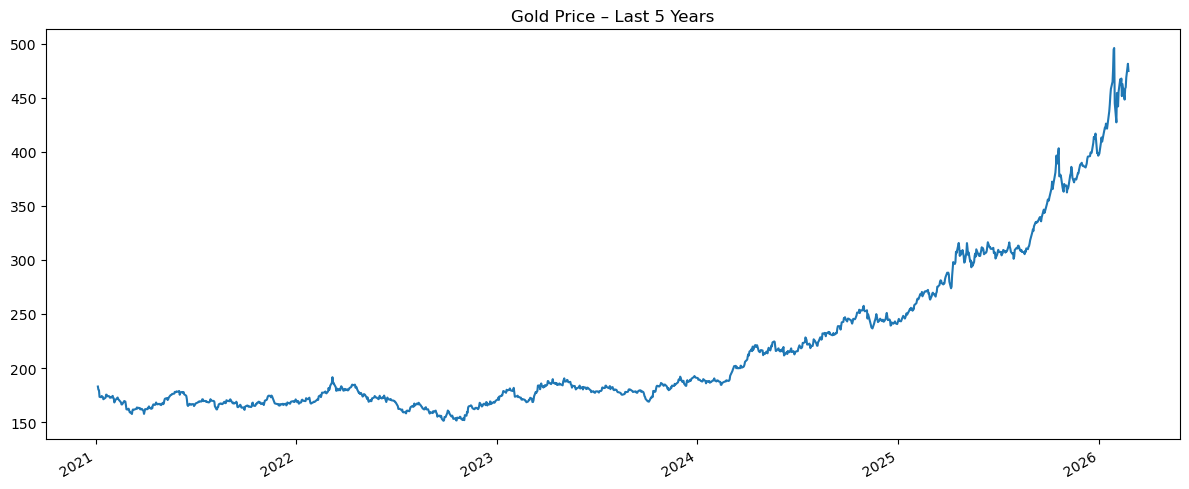

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.close("all")

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df["Date"], df["gold"])
ax.set_title("Gold Price – Last 5 Years")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.minorticks_off()

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [46]:
df["gold"].describe()

count    1290.000000
mean      217.639287
std        71.702019
min       151.229996
25%       169.514996
50%       182.470001
75%       244.492496
max       495.899994
Name: gold, dtype: float64

In [47]:
df.to_csv("gold_macro_features.csv", index=False)
print("Saved gold_macro_features.csv")

Saved gold_macro_features.csv
